In [96]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import tweepy
import time
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import functools
from functools import reduce
import seaborn as sns

# Gathering

In [2]:
twitter_archive = pd.read_csv('/Users/hamadwaheed/Desktop/twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [ ]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)

In [14]:
images = pd.read_csv('image_predictions.tsv', sep = '\t')

In [15]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
consumer_key = '****'
consumer_secret = '****'
access_token = '****'
access_secret = '****'

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [6]:
tweet_ids = list(twitter_archive['tweet_id'])

tweet_data = []
tweet_id_success = []
tweet_id_missing = []

for tweet_id in tweet_ids:
    try:
        data = api.get_status(tweet_id, 
                              tweet_mode='extended',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        tweet_id_success.append(tweet_id)
        
    except:
        tweet_id_missing.append(tweet_id)
        print(tweet_id)
        
print("Finished")

888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
851953902622658560
845459076796616705
844704788403113984
842892208864923648
837366284874571778
837012587749474308
829374341691346946
827228250799742977
812747805718642688
802247111496568832
779123168116150273
775096608509886464
771004394259247104
770743923962707968
759566828574212096


Rate limit reached. Sleeping for: 182


754011816964026368
680055455951884288


Rate limit reached. Sleeping for: 772


Finished


In [7]:
with open('tweet_json.txt', mode = 'w') as f:
    json.dump(tweet_data, f)
    print("Reached")

Reached


In [8]:
twitter2 = pd.read_json('tweet_json.txt')

In [9]:
twitter2.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [10]:
twitter2 = pd.read_json('tweet_json.txt')
twitter2['tweet_id'] = tweet_id_success
twitter2 = twitter2[['tweet_id', 'favorite_count', 'retweet_count']]

In [11]:
twitter2.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35820,7588
1,892177421306343426,30922,5623
2,891815181378084864,23272,3720
3,891689557279858688,39100,7766
4,891327558926688256,37352,8362


In [12]:
twitter2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   favorite_count  2331 non-null   int64
 2   retweet_count   2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


# Assess

### twitter_archive

In [50]:
twitter_archive.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [18]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [20]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
twitter_archive.mean()

tweet_id                    7.427716e+17
in_reply_to_status_id       7.455079e+17
in_reply_to_user_id         2.014171e+16
retweeted_status_id         7.720400e+17
retweeted_status_user_id    1.241698e+16
rating_numerator            1.312649e+01
rating_denominator          1.045543e+01
dtype: float64

In [51]:
twitter_archive['name'].value_counts().head(50)

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
Sadie         8
the           8
Buddy         7
an            7
Bailey        7
Toby          7
Daisy         7
Oscar         6
Jax           6
Milo          6
Leo           6
Rusty         6
Jack          6
Bella         6
Stanley       6
Scout         6
Dave          6
Koda          6
Phil          5
Alfie         5
Sammy         5
Louis         5
Oakley        5
Chester       5
Sunny         5
Finn          5
very          5
George        5
Bentley       5
Gus           5
Larry         5
Maggie        4
Ruby          4
Carl          4
Dexter        4
Derek         4
Moose         4
Reginald      4
Clarence      4
Name: name, dtype: int64

In [34]:
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [35]:
twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [36]:
twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [37]:
twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [39]:
twitter_archive['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/842163532590374912/photo/1,https://twitter.com/dog_rates/status/842163532590374912/photo/1                                                             2
https://twitter.com/dog_rates/status/700747788515020802/photo/1                                                                                                                             2
https://www.gofundme.com/lolas-life-saving-surgery-funds,https://twitter.com/dog_rates/status/835264098648616962/photo/1,https://twitter.com/dog_rates/status/835264098648616962/photo/1    2
https://twitter.com/dog_rates/status/844704788403113984/photo/1                                                                                                                             2
https://twitter.com/dog_rates/status/767754930266464257/photo/1                                                                                                                             2
                                                  

In [38]:
twitter_archive.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2041,671542985629241344,NaN,NaN,2015-12-01 04:14:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is JD (stands for ""just dog""). He's like ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671542985...,10,10,JD,None,None,None,None


### images

In [29]:
images.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [26]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
images.mean()

tweet_id    7.384514e+17
img_num     1.203855e+00
p1_conf     5.945483e-01
p1_dog      7.383133e-01
p2_conf     1.345886e-01
p2_dog      7.484337e-01
p3_conf     6.032417e-02
p3_dog      7.224096e-01
dtype: float64

In [42]:
images['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pencil_box              1
padlock                 1
coffee_mug              1
pot                     1
grille                  1
Name: p1, Length: 378, dtype: int64

In [43]:
images['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [44]:
images['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [45]:
images['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [46]:
images['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [47]:
images['jpg_url'].value_counts()

https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg    2
https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg    2
https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg    2
https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg    2
https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg    2
                                                  ..
https://pbs.twimg.com/media/Cf8qDFbWwAEf8M3.jpg    1
https://pbs.twimg.com/media/Cf9W1J-UMAErahM.jpg    1
https://pbs.twimg.com/media/CUdloW8WEAAxB_Y.jpg    1
https://pbs.twimg.com/media/CW37xZbUoAAUXe5.jpg    1
https://pbs.twimg.com/media/Ci3GDeyUoAAKOxn.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

### twitter2

In [22]:
twitter2.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35820,7588
1,892177421306343426,30922,5623
2,891815181378084864,23272,3720
3,891689557279858688,39100,7766
4,891327558926688256,37352,8362


In [23]:
twitter2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   favorite_count  2331 non-null   int64
 2   retweet_count   2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [24]:
twitter2.describe()

,tweet_id,favorite_count,retweet_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,7480.672244,2666.149721
std,6.823170e+16,11615.218036,4508.884457
min,6.660209e+17,0.000000,1.000000
25%,6.782670e+17,1302.000000,541.000000
50%,7.182469e+17,3250.000000,1246.000000
75%,7.986692e+17,9161.000000,3099.500000
max,8.924206e+17,154400.000000,76644.000000


In [40]:
twitter2.mean

<bound method DataFrame.mean of                 tweet_id  favorite_count  retweet_count
0     892420643555336193           35820           7588
1     892177421306343426           30922           5623
2     891815181378084864           23272           3720
3     891689557279858688           39100           7766
4     891327558926688256           37352           8362
...                  ...             ...            ...
2326  666049248165822465              96             40
2327  666044226329800704             267            130
2328  666033412701032449             111             41
2329  666029285002620928             120             42
2330  666020888022790149            2383            458

[2331 rows x 3 columns]>

## Quality 

### twitter_archive

1- Doggo, floofer, pupper, puppo have none instead of NaN

2- some rows do not have images

3- retweet_status and timestamps are objects

4- there are 2356 entries in twitter_archive datafreame and only 2075 in the images dataframe

5- There are 55 names that are just "a"

6- A lot of the data is retweets

7- row 22 has dog name "such"

###  twitter2

8- twitter2 has 2331 entries while twitter_archive has 2356

## Tidiness

1- Doggo, floofer, puppo, and pupper can be displayed more concisely and in one column

2- the origninal and twitter 2 dataframes can be merged


# Clean

In [53]:
twitter_archive_clean = twitter_archive.copy()
twitter2_clean = twitter2.copy()
images_clean = images.copy()

## Tidiness

##### First issue is to merge dataframes

 ###### Define: All the dataframes need to be combined

##### Code

In [63]:
dfs = [twitter_archive_clean, twitter2_clean, images_clean]
twitter = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)

##### Test

In [65]:
twitter.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [66]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2059 non-null   object 
 4   source                      2059 non-null   object 
 5   text                        2059 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2059 non-null   object 
 10  rating_numerator            2059 non-null   int64  
 11  rating_denominator          2059 non-null   int64  
 12  name                        2059 non-null   object 
 13  doggo                       2059 

#### Second issue is to address the four seperate columns for dog types

#### Define: move different dog types into one column dog_type

#### Code

In [69]:
twitter['dog_type'] = twitter['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [72]:
twitter[['dog_stage','doggo', 'floofer', 'pupper', 'puppo']].head(20)

,dog_stage,doggo,floofer,pupper,puppo
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None
5,NaN,None,None,None,None
6,NaN,None,None,None,None
7,NaN,None,None,None,None
8,NaN,None,None,None,None
9,doggo,doggo,None,None,None


In [73]:
twitter = twitter.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [74]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2059 non-null   object 
 4   source                      2059 non-null   object 
 5   text                        2059 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2059 non-null   object 
 10  rating_numerator            2059 non-null   int64  
 11  rating_denominator          2059 non-null   int64  
 12  name                        2059 non-null   object 
 13  favorite_count              2059 

## Quality

##### Quality issue 1, dog types have NaN solved in tidying

#### Quality issue 2
#### some rows to do not have images
#### Define: drop rows with no images

#### Code

In [85]:
twitter = twitter[twitter['expanded_urls'].notnull()]

#### Test

In [86]:
twitter['expanded_urls'].isnull().sum()

0

##### Quality issue 3- Timestamp
##### define: the timestamp and retweeted_status need to be changed from object

#### Code

In [78]:
twitter['timestamp'] = twitter['timestamp'].str.slice(start=0, stop=-6)

In [79]:
twitter['timestamp'] = pd.to_datetime(twitter['timestamp'], format = "%Y-%m-%d %H:%M:%S")

#### Test

In [80]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1987 non-null   int64         
 1   in_reply_to_status_id  23 non-null     float64       
 2   in_reply_to_user_id    23 non-null     float64       
 3   timestamp              1987 non-null   datetime64[ns]
 4   source                 1987 non-null   object        
 5   text                   1987 non-null   object        
 6   expanded_urls          1987 non-null   object        
 7   rating_numerator       1987 non-null   int64         
 8   rating_denominator     1987 non-null   int64         
 9   name                   1987 non-null   object        
 10  favorite_count         1987 non-null   int64         
 11  retweet_count          1987 non-null   int64         
 12  jpg_url                1987 non-null   object        
 13  img

#### Quality issue 4
#### unequal amount of rown between dataframes
#### Issue solved in tidying when dataframes were merged

#### Quality issue 5
#### 55 dogs named "a" and some have a name of "none", all incorrect names are lowercase
#### define: need to replace innacurate name with NaN

#### code

In [89]:
lowercase_names = []
for row in twitter['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)

In [90]:
twitter['name'].replace(lowercase_names, 
                        np.nan,
                       inplace = True)

# Replace all 'None's with a NaN
twitter['name'].replace('None', 
                        np.nan,
                       inplace = True)

#### Test

In [92]:
twitter['name'].value_counts()

Oliver     10
Cooper     10
Charlie    10
Tucker      9
Penny       9
           ..
Mason       1
Wafer       1
Darla       1
Pinot       1
Staniel     1
Name: name, Length: 911, dtype: int64

##### Quality issue 6   
##### remove retweets

##### Define: need to remove retweets from dataframe as it is not original

##### Code

In [76]:
twitter = twitter[np.isnan(twitter.retweeted_status_id)]

print(twitter.info())

twitter = twitter.drop(['retweeted_status_id', 
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp'], 
                       axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1987 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1987 non-null   object 
 4   source                      1987 non-null   object 
 5   text                        1987 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1987 non-null   object 
 10  rating_numerator            1987 non-null   int64  
 11  rating_denominator          1987 non-null   int64  
 12  name                        1987 non-null   object 
 13  favorite_count              1987 

#### Test

In [77]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1987 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1987 non-null   object 
 4   source                 1987 non-null   object 
 5   text                   1987 non-null   object 
 6   expanded_urls          1987 non-null   object 
 7   rating_numerator       1987 non-null   int64  
 8   rating_denominator     1987 non-null   int64  
 9   name                   1987 non-null   object 
 10  favorite_count         1987 non-null   int64  
 11  retweet_count          1987 non-null   int64  
 12  jpg_url                1987 non-null   object 
 13  img_num                1987 non-null   int64  
 14  p1                     1987 non-null   object 
 15  p1_c

#### Quality issue 7, dog named as "such"
#### Quality issue fixed with issue 5 when all lowercase dog names were changed to NaN

#### Quality issue 8
#### twitter2 dataframe has 2331 entries while twitter_archive has 2356
#### issue resolved during tidying when dataframes

## Storing data

In [94]:
twitter.to_csv('twitter_archive_master.csv')

## Analyze and Visualize

/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


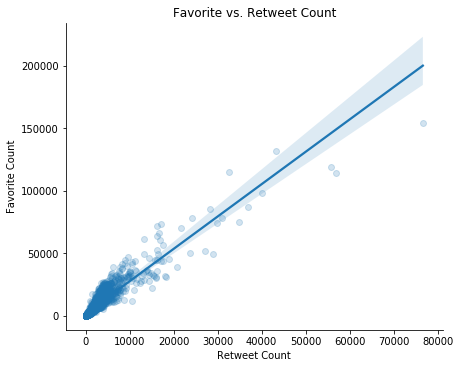

In [97]:
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=twitter,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

##### The above scatterplot reeals that the favorite/retweet count ration is about 4/1. 

In [108]:
twitter.info

<bound method DataFrame.info of                 tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2054  666049248165822465                    NaN                  NaN   
2055  666044226329800704                    NaN                  NaN   
2056  666033412701032449                    NaN                  NaN   
2057  666029285002620928                    NaN                  NaN   
2058  666020888022790149                    NaN                  NaN   

               timestamp                                             source  \
0    2017-08-01 16:23:56

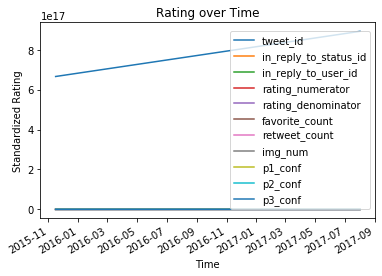

In [127]:
twitter.groupby('timestamp').mean().plot(kind='line')
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
plt.show;

#### Here we can see that the rating over time is gradually going up, assuming twitter gains more popularity and more users

#### We can also tell that the average rating steadily increases from a litle above 6 over time

/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


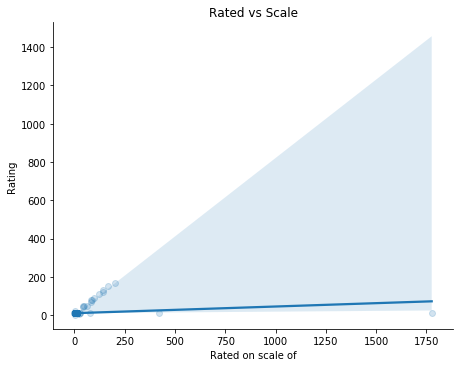

In [140]:
sns.lmplot(x="rating_numerator", 
           y="rating_denominator", 
           data=twitter,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Rated vs Scale')
plt.xlabel('Rated on scale of')
plt.ylabel('Rating');

### Here we can see on average every rating falls at the top of the scale, also there are two outliers which we had not known about previously, these must be tremendously good boys

## Wrangle_report